In [1534]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


hfont = {'fontname':'Helvetica'}

## read data from Alysssa
HSA_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/hsa_time_data.csv")
County_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/county_time_data.csv")

## read in data from https://gis.cdc.gov/grasp/COVIDNet/COVID19_3.html
State_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/COVID-19Surveillance_All_Data_Hospitalizations.csv")


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/3898652602.py:10: DtypeWarning: Columns (39,41,42,44,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  HSA_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/hsa_time_data.csv")
/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/3898652602.py:11: DtypeWarning: Columns (45,46,47,49,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  County_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/county_time_data.csv")


In [762]:
len(HSA_data['health_service_area'].unique())

804

In [763]:
print(HSA_data['date'][0])
print(HSA_data['date'][len(HSA_data['date']) - 1])
print(County_data['date'][0])
print(County_data['date'][len(County_data['date']) - 1])

2021-03-03
2022-10-19
2021-03-03
2022-10-19


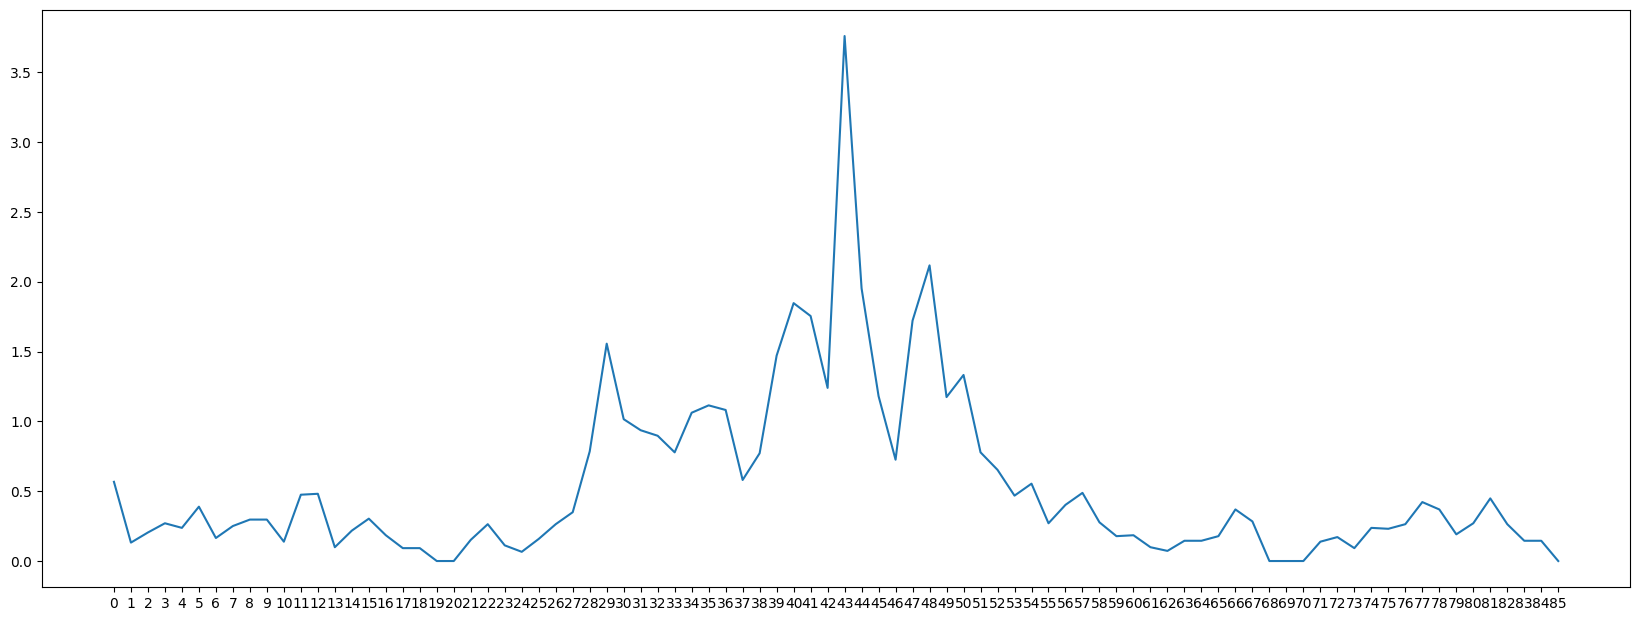

In [764]:
fig, axs = plt.subplots(figsize=(20.5, 7.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
axs.set_xticks(range(len(HSA_data.loc[HSA_data['health_service_area'] == 'Allegany (Cumberland), MD - Garrett, MD', 'date'])), range(len(HSA_data.loc[HSA_data['health_service_area'] == 'Allegany (Cumberland), MD - Garrett, MD', 'date'])))
axs.plot(HSA_data.loc[HSA_data['health_service_area'] == 'Allegany (Cumberland), MD - Garrett, MD', 'date'], HSA_data.loc[HSA_data['health_service_area'] == 'Allegany (Cumberland), MD - Garrett, MD', 'deaths_avg_per_100k'])


Data from https://gis.cdc.gov/grasp/COVIDNet/COVID19_3.html
- Only has 14 states 
- Does go back to March 2020

In [765]:
## subset data that is for states (i.e. not "catchement = entire network")

State_data = State_data.loc[State_data["CATCHMENT"] != "Entire Network"]

In [766]:
week_1 = int(State_data.loc[State_data["MMWR-YEAR"] == 2020, "MMWR-WEEK"].min())
week_26 = int(week_1 + 26) # 26 weeks = 6 months
first_six_months = State_data[(State_data["MMWR-YEAR"] == 2020) & (State_data["MMWR-WEEK"] == week_26)]
first_six_months['WEEKLY RATE ']

3536      1.7
3537      6.4
3538     10.0
3539      2.9
3540      0.0
         ... 
85452     8.8
85453     8.5
85455     2.4
85457     3.0
85458     6.1
Name: WEEKLY RATE , Length: 364, dtype: float64

In [767]:
first_six_months_by_catchement = pd.DataFrame(index=range(26), columns= first_six_months['CATCHMENT'].unique())

for state in first_six_months['CATCHMENT'].unique(): 
    first_six_months_by_catchement[state] = first_six_months.loc[first_six_months['CATCHMENT'] == state, 'WEEKLY RATE '].values

Text(0, 0.5, 'Hospitalizations per 100k')

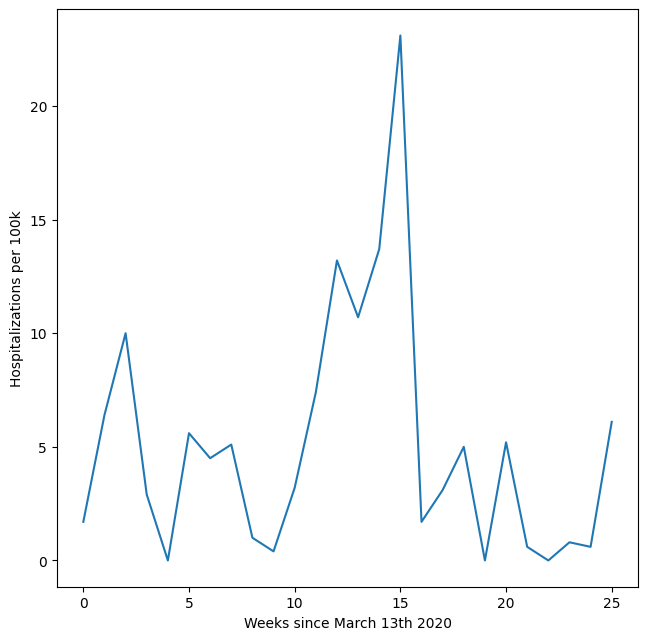

In [768]:
fig, axs = plt.subplots(figsize=(7.5, 7.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
#first_six_months_by_catchement.plot()
first_six_months_by_catchement['index'] = range(len(first_six_months_by_catchement))
axs.plot(first_six_months_by_catchement['index'], first_six_months_by_catchement['California'])
axs.set_xlabel('Weeks since March 13th 2020')

# Set the y-axis label
axs.set_ylabel('Hospitalizations per 100k')


## Data from https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh
- Hospitalizations
- Use total adult patients with covid and total pediatric patients with covid for total covid cases
- Try and plot to match up 
- Also has previous day admissions - can try and get cumulative over 7 days to match with weekly admissions

In [1366]:
State_hospitalizations = pd.read_csv("/Users/rem76/Documents/COVID_projections/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv")
#State_hospitalizations.columns

Find the percentage of beds used by covid patients? 

In [1271]:
State_hospitalizations_total_hospitalizations = State_hospitalizations[['date', 'state', 'inpatient_beds', 'inpatient_beds_used']]
State_hospitalizations_total_hospitalizations['percent_beds_used'] = State_hospitalizations['inpatient_beds_used']/State_hospitalizations['inpatient_beds'] * 100
State_hospitalizations_total_hospitalizations['percent_beds_used']

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/3507432576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  State_hospitalizations_total_hospitalizations['percent_beds_used'] = State_hospitalizations['inpatient_beds_used']/State_hospitalizations['inpatient_beds'] * 100


0        73.230021
1        80.868800
2        58.607189
3        56.991899
4        69.273229
           ...    
64320    72.120374
64321    82.395779
64322    78.255426
64323    72.950881
64324    73.531982
Name: percent_beds_used, Length: 64325, dtype: float64

In [1405]:
State_hospitalizations_total_hospitalizations = State_hospitalizations[['date', 'state', 'percent_of_inpatients_with_covid_numerator']]
State_hospitalizations_total_hospitalizations.rename(columns={'percent_of_inpatients_with_covid_numerator': 'case_numbers'}, inplace=True)

State_hospitalizations_total_hospitalizations = State_hospitalizations_total_hospitalizations.sort_values('date').reset_index(drop=True)
# Dates are daily, and data is not collected routinely for all states until March.
# Take the first date as '2020/03/13' when the Trump admin declared nationwide state of emergency.
State_hospitalizations_total_hospitalizations['index'] = range(len(State_hospitalizations_total_hospitalizations['date']))
start_date_row = State_hospitalizations_total_hospitalizations[State_hospitalizations_total_hospitalizations['date'] == '2020/03/01']['index'].min()

start_date_index_dates = int(np.where(State_hospitalizations_total_hospitalizations['date'].unique() == '2020/03/01')[0])
six_month_date_index_dates = State_hospitalizations_total_hospitalizations['date'].unique()[(26 * 7) + start_date_index_dates]
end_date_row = State_hospitalizations_total_hospitalizations[State_hospitalizations_total_hospitalizations['date'] == six_month_date_index_dates]['index'].max()
State_hospitalizations_total_hospitalizations_first_six_months = State_hospitalizations_total_hospitalizations[start_date_row:end_date_row]


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/3892282392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  State_hospitalizations_total_hospitalizations.rename(columns={'percent_of_inpatients_with_covid_numerator': 'case_numbers'}, inplace=True)
/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/3892282392.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date_index_dates = int(np.where(State_hospitalizations_total_hospitalizations['date'].unique() == '2020/03/01')[0])


In [1406]:
## Remove PR and VI 
State_hospitalizations_total_hospitalizations_first_six_months = State_hospitalizations_total_hospitalizations_first_six_months[(State_hospitalizations_total_hospitalizations_first_six_months['state'] != 'PR') & (State_hospitalizations_total_hospitalizations_first_six_months['state'] != 'VI')]


In [1408]:
State_hospitalizations_total_hospitalizations_first_six_months

,date,state,case_numbers,index
559,2020/03/01,OH,0.0,559
560,2020/03/01,NV,0.0,560
561,2020/03/01,KS,0.0,561
562,2020/03/01,ND,0.0,562
563,2020/03/01,OR,0.0,563
...,...,...,...,...
9920,2020/08/30,FL,5129.0,9920
9922,2020/08/30,OH,1263.0,9922
9923,2020/08/30,DE,84.0,9923
9924,2020/08/30,CO,219.0,9924


In [1409]:
from datetime import datetime, timedelta 
State_hospitalizations_total_hospitalizations_first_six_months['date'] = pd.to_datetime(State_hospitalizations_total_hospitalizations_first_six_months['date'])

start_date = State_hospitalizations_total_hospitalizations_first_six_months['date'].min()
end_date = State_hospitalizations_total_hospitalizations_first_six_months['date'].max()

dates = []
current_date = start_date

while current_date <= end_date:
    dates.append(current_date)
    current_date += timedelta(days=7)

num_rows = len(dates)*len(State_hospitalizations_total_hospitalizations_first_six_months['state'].unique())


In [1424]:
first_six_months_by_state_weekly_hospital_cases = pd.DataFrame(columns=State_hospitalizations_total_hospitalizations_first_six_months.columns[0:3], index=range(num_rows))

x = -1

for state in State_hospitalizations_total_hospitalizations_first_six_months['state'].unique():
    #x += 1
    state_data = State_hospitalizations_total_hospitalizations_first_six_months[State_hospitalizations_total_hospitalizations_first_six_months['state'] == state].reset_index()

    for date in dates: 
        x += 1
        first_six_months_by_state_weekly_hospital_cases.iloc[x,1] = state
        first_six_months_by_state_weekly_hospital_cases.iloc[x,0] = date
        if (state_data.loc[0, 'date'] > date) | (state_data.loc[0, 'date'] >= (date - timedelta(days=7))):
            q = 0
            #State_hospitalizations_new_weekly.iloc[x,2] = 0
        else: 
            end_index = state_data.loc[state_data['date'] < date, 'date'].idxmax()
            start_index = state_data.loc[(state_data['date'] <= (date - timedelta(days=7))), 'date'].idxmax()
            selected_rows = state_data.iloc[start_index:end_index, len(state_data.columns)-1]
            cumulative_sum = selected_rows.sum()
                
            first_six_months_by_state_weekly_hospital_cases.iloc[x,2] = cumulative_sum



In [1425]:
first_six_months_by_state_weekly_hospital_cases = first_six_months_by_state_weekly_hospital_cases.pivot_table(index='date', columns='state', values='case_numbers')

- Try per 100k in California 
- Population of California April 2020 39,538,245
- Data on population from https://data.census.gov/table?q=population+2020&g=040XX00US01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56

In [1535]:
population_by_state_April_2020 = {
    'Alabama': 5024279,
    'Alaska': 733391,
    'Arizona': 7151502,
    'Arkansas': 3011524,
    'California': 39538223,
    'Colorado': 5773714,
    'Connecticut': 3605944,
    'Delaware': 989948,
    'District of Columbia': 689545,
    'Florida': 21538187,
    'Georgia': 10711908,
    'Hawaii': 1455271,
    'Idaho': 1839106,
    'Illinois': 12812508,
    'Indiana': 6785528,
    'Iowa': 3190369,
    'Kansas': 2937880,
    'Kentucky': 4505836,
    'Louisiana': 4657757,
    'Maine': 1362359,
    'Maryland': 6177224,
    'Massachusetts': 7029917,
    'Michigan': 10077331,
    'Minnesota': 5706494,
    'Mississippi': 2961279,
    'Missouri': 6154913,
    'Montana': 1084225,
    'Nebraska': 1961504,
    'Nevada': 3104614,
    'New Hampshire': 1377529,
    'New Jersey': 9288994,
    'New Mexico': 2117522,
    'New York': 20201249,
    'North Carolina': 10439388,
    'North Dakota': 779094,
    'Ohio': 11799448,
    'Oklahoma': 3959353,
    'Oregon': 4237256,
    'Pennsylvania': 13002700,
    'Rhode Island': 1097379,
    'South Carolina': 5118425,
    'South Dakota': 886667,
    'Tennessee': 6910840,
    'Texas': 29145505,
    'Utah': 3271616,
    'Vermont': 643077,
    'Virginia': 8631393,
    'Washington': 7705281,
    'West Virginia': 1793716,
    'Wisconsin': 5893718,
    'Wyoming': 576851
}


In [1331]:
def convert_state_name_to_abbreviation(state_name):
    state_name = state_name.lower().strip()

    state_abbreviations = {
        'alabama': 'AL',
        'alaska': 'AK',
        'arizona': 'AZ',
        'arkansas': 'AR',
        'california': 'CA',
        'colorado': 'CO',
        'connecticut': 'CT',
        'delaware': 'DE',
        'florida': 'FL',
        'georgia': 'GA',
        'hawaii': 'HI',
        'idaho': 'ID',
        'illinois': 'IL',
        'indiana': 'IN',
        'iowa': 'IA',
        'kansas': 'KS',
        'kentucky': 'KY',
        'louisiana': 'LA',
        'maine': 'ME',
        'maryland': 'MD',
        'massachusetts': 'MA',
        'michigan': 'MI',
        'minnesota': 'MN',
        'mississippi': 'MS',
        'missouri': 'MO',
        'montana': 'MT',
        'nebraska': 'NE',
        'nevada': 'NV',
        'new hampshire': 'NH',
        'new jersey': 'NJ',
        'new mexico': 'NM',
        'new york': 'NY',
        'north carolina': 'NC',
        'north dakota': 'ND',
        'ohio': 'OH',
        'oklahoma': 'OK',
        'oregon': 'OR',
        'pennsylvania': 'PA',
        'rhode island': 'RI',
        'south carolina': 'SC',
        'south dakota': 'SD',
        'tennessee': 'TN',
        'texas': 'TX',
        'utah': 'UT',
        'vermont': 'VT',
        'virginia': 'VA',
        'washington': 'WA',
        'washington dc': 'DC',
        'west virginia': 'WV',
        'wisconsin': 'WI',
        'wyoming': 'WY',
        'district of columbia': 'DC'
    }

    return state_abbreviations.get(state_name, None)


In [1332]:
population_by_state_April_2020_abb = {}
states_to_remove = []

for state_name in population_by_state_April_2020:
    state_abbreviation = convert_state_name_to_abbreviation(state_name)
    if state_abbreviation:
        population_by_state_April_2020_abb[state_abbreviation] = population_by_state_April_2020[state_name]




In [1426]:
first_six_months_by_state_weekly_hospital_cases = first_six_months_by_state_weekly_hospital_cases.reset_index()
state_names = first_six_months_by_state_weekly_hospital_cases.columns[(first_six_months_by_state_weekly_hospital_cases.columns != 'date') & (first_six_months_by_state_weekly_hospital_cases.columns != 'index')]
for state in state_names: 
    col_name_rate = state + 'hospitalizations'
    first_six_months_by_state_weekly_hospital_cases[col_name_rate] = first_six_months_by_state_weekly_hospital_cases[state]/population_by_state_April_2020_abb[state] * 100000
    col_name_threshold = state + '_over_15_100k'
    first_six_months_by_state_weekly_hospital_cases[col_name_threshold] = (first_six_months_by_state_weekly_hospital_cases[col_name_rate] > 15)*1
    col_name_delta = state + '_delta_100k'
    row = 0
    for j in range(len(first_six_months_by_state_weekly_hospital_cases[state])):
        if row < 7:
            first_six_months_by_state_weekly_hospital_cases.loc[row, col_name_delta] = 0
        else: 
            first_six_months_by_state_weekly_hospital_cases.loc[row, col_name_delta] = first_six_months_by_state_weekly_hospital_cases.loc[row, col_name_rate] - first_six_months_by_state_weekly_hospital_cases.loc[row - 7, col_name_rate]
        row += 1

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/1032320196.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  first_six_months_by_state_weekly_hospital_cases.loc[row, col_name_delta] = 0
/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/1032320196.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  first_six_months_by_state_weekly_hospital_cases[col_name_rate] = first_six_months_by_state_weekly_hospital_cases[state]/population_by_state_April_2020_abb[state] * 100000
/var/folders/d4/chxwf4hs5kq7tts

Text(0, 0.5, 'Hospitalizations per 100k')

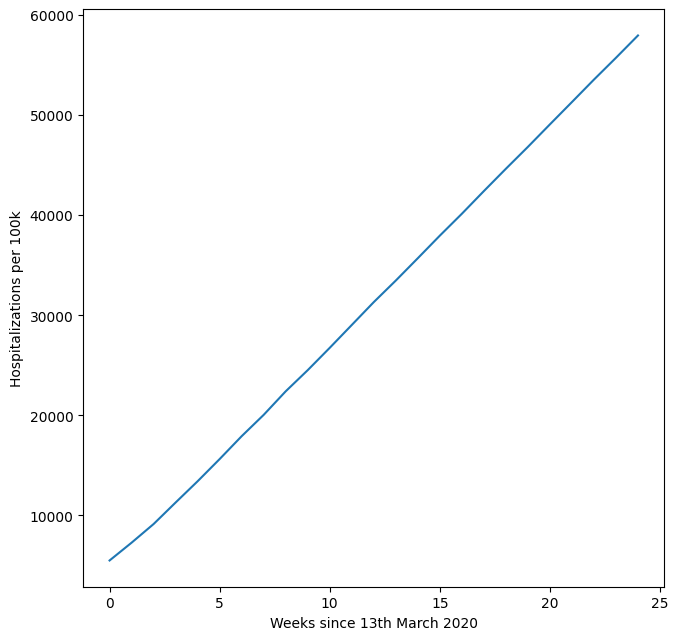

In [1439]:
fig, axs = plt.subplots(figsize=(7.5, 7.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')

axs.plot(range(len(first_six_months_by_state_weekly_hospital_cases['CA'])), first_six_months_by_state_weekly_hospital_cases['HI'])
axs.set_xlabel('Weeks since 13th March 2020')
axs.set_ylabel('Hospitalizations per 100k')




In [1357]:
#first_six_months_by_state.to_csv("first_six_months_by_state_hospitalizations.csv")

# Use this same dataset to get the weekly hospital admissions

In [1533]:
## rows with hospitalization data 

#'previous_day_admission_adult_covid_confirmed'		'previous_day_admission_adult_covid_suspected' 'previous_day_admission_pediatric_covid_confirmed'		'previous_day_admission_pediatric_covid_suspected'


State_hospitalizations_new_daily = State_hospitalizations[['date', 'state','previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected']]

KeyError: "['previous_day_admission_adult_covid_confirmed', 'previous_day_admission_adult_covid_suspected', 'previous_day_admission_pediatric_covid_confirmed', 'previous_day_admission_pediatric_covid_suspected'] not in index"

In [1070]:
State_hospitalizations_new_daily[State_hospitalizations_new_daily['state'] == 'CA']

,date,state,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_suspected,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_suspected
919,2020/09/01,CA,455.0,750.0,6.0,25.0
967,2020/12/11,CA,1864.0,694.0,27.0,32.0
1037,2020/10/27,CA,353.0,436.0,4.0,8.0
1162,2020/11/25,CA,1003.0,508.0,11.0,31.0
1192,2020/12/01,CA,1207.0,625.0,16.0,25.0
...,...,...,...,...,...,...
63878,2022/09/19,CA,301.0,250.0,11.0,15.0
63954,2022/11/30,CA,711.0,406.0,19.0,23.0
63996,2022/10/11,CA,286.0,324.0,11.0,19.0
64069,2022/10/01,CA,280.0,241.0,11.0,10.0


In [1071]:

State_hospitalizations_new_daily = State_hospitalizations_new_daily.sort_values('date').reset_index(drop=True)
# Dates are daily, and data is not collected routinely for all states until March.
# Take the first date as '2020/03/13' when the Trump admin declared nationwide state of emergency.
#  However, COVID-NET reports data week ending 7th March, a Saturday, and reports Sunday-Saturday. So start Sunday 1st March
State_hospitalizations_new_daily['index'] = range(len(State_hospitalizations_new_daily['date']))
start_date_row = State_hospitalizations_new_daily[State_hospitalizations_new_daily['date'] == '2020/03/01']['index'].min()

start_date_index_dates = int(np.where(State_hospitalizations_new_daily['date'].unique() == '2020/03/01')[0])
six_month_date_index_dates = State_hospitalizations_new_daily['date'].unique()[(26 * 7) + start_date_index_dates]
end_date_row = State_hospitalizations_new_daily[State_hospitalizations_new_daily['date'] == six_month_date_index_dates]['index'].max()


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/1107799588.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date_index_dates = int(np.where(State_hospitalizations_new_daily['date'].unique() == '2020/03/01')[0])


In [1072]:
State_hospitalizations_new_daily[State_hospitalizations_new_daily['state'] == 'CA']

,date,state,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_suspected,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_suspected,index
277,2020/02/04,CA,NaN,NaN,NaN,NaN,277
294,2020/02/05,CA,NaN,NaN,NaN,NaN,294
302,2020/02/06,CA,NaN,NaN,NaN,NaN,302
316,2020/02/07,CA,NaN,NaN,NaN,NaN,316
319,2020/02/08,CA,NaN,NaN,NaN,NaN,319
...,...,...,...,...,...,...,...
64057,2023/06/06,CA,188.0,165.0,7.0,8.0,64057
64154,2023/06/07,CA,162.0,155.0,3.0,8.0,64154
64212,2023/06/08,CA,191.0,112.0,4.0,7.0,64212
64240,2023/06/09,CA,168.0,147.0,9.0,4.0,64240


In [1028]:
## COVID-NET is week ending 7th March (Saturday) 
State_hospitalizations_new_daily_first_six_months = State_hospitalizations_new_daily[start_date_row:end_date_row]
State_hospitalizations_new_daily_first_six_months = State_hospitalizations_new_daily_first_six_months[(State_hospitalizations_new_daily_first_six_months['state'] != 'PR') & (State_hospitalizations_new_daily_first_six_months['state'] != 'VI')]
State_hospitalizations_new_daily_first_six_months['all_new_hospitalizations'] = State_hospitalizations_new_daily_first_six_months[['previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected']].sum(axis=1)
State_hospitalizations_new_daily_first_six_months = State_hospitalizations_new_daily_first_six_months.sort_values(by=['state', 'date'])
State_hospitalizations_new_daily_first_six_months = State_hospitalizations_new_daily_first_six_months.reset_index(drop = True, inplace = False)


In [1029]:
from datetime import datetime, timedelta 
State_hospitalizations_new_daily_first_six_months['date'] = pd.to_datetime(State_hospitalizations_new_daily_first_six_months['date'])

start_date = State_hospitalizations_new_daily_first_six_months['date'].min()
end_date = State_hospitalizations_new_daily_first_six_months['date'].max()

dates = []
current_date = start_date

while current_date <= end_date:
    dates.append(current_date)
    current_date += timedelta(days=7)

num_rows = len(dates)*len(State_hospitalizations_new_daily_first_six_months['state'].unique())
# Create an empty DataFrame to store the cumulative sums
State_hospitalizations_new_weekly = pd.DataFrame(columns=State_hospitalizations_new_daily_first_six_months.columns[[0, 1, 7]], index=range(num_rows + 1))



In [1053]:
x = -1

for state in State_hospitalizations_new_daily_first_six_months['state'].unique():
    #x += 1
    state_data = State_hospitalizations_new_daily_first_six_months[State_hospitalizations_new_daily_first_six_months['state'] == state].reset_index()

    for date in dates: 
        x += 1
        #print(date)
        State_hospitalizations_new_weekly.iloc[x,1] = state
        State_hospitalizations_new_weekly.iloc[x,0] = date
        if (state_data.loc[0, 'date'] > date) | (state_data.loc[0, 'date'] >= (date - timedelta(days=7))):
            q = 0
            #State_hospitalizations_new_weekly.iloc[x,2] = 0
        else: 
            end_index = state_data.loc[state_data['date'] < date, 'date'].idxmax()
            start_index = state_data.loc[(state_data['date'] <= (date - timedelta(days=7))), 'date'].idxmax()
            selected_rows = state_data.iloc[start_index:end_index, len(state_data.columns)-1]
            cumulative_sum = selected_rows.sum()
                
            State_hospitalizations_new_weekly.iloc[x,2] = cumulative_sum



        

In [1055]:
State_hospitalizations_new_weekly.to_csv("State_hospitalizations_new_weekly.csv")

In [1056]:
wide_df = State_hospitalizations_new_weekly.pivot_table(index='date', columns='state', values='all_new_hospitalizations')


<Axes: xlabel='date'>

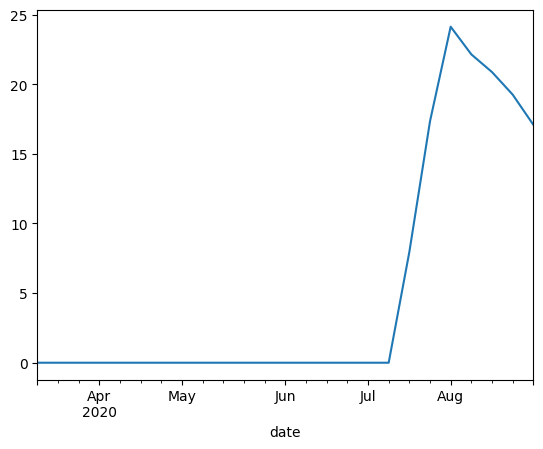

In [1064]:
(wide_df['CA']/population_by_state_April_2020_abb['CA'] * 100000).plot()

- So lots of the data is missing... Could use the hospital capacity

# Try data from https://covidtracking.com/about-data/data-definitions#hospitalization

In [1121]:

## "New total hospitalizations" is based on the previous day 
hospitalizations_covid_tracker_daily_all =  pd.read_csv("/Users/rem76/Documents/COVID_projections/all-states-history.csv")
new_hospitalizations_covid_tracker_daily = hospitalizations_covid_tracker_daily_all[['date', 'state', 'hospitalizedIncrease']]
new_hospitalizations_covid_tracker_daily = new_hospitalizations_covid_tracker_daily.sort_values('date').reset_index(drop=True)
new_hospitalizations_covid_tracker_daily = new_hospitalizations_covid_tracker_daily.sort_values(['state', 'date']).reset_index(drop=True)
new_hospitalizations_covid_tracker_daily['date'] = pd.to_datetime(new_hospitalizations_covid_tracker_daily['date'])
new_hospitalizations_covid_tracker_daily = new_hospitalizations_covid_tracker_daily[(new_hospitalizations_covid_tracker_daily['state'] != 'PR') & (new_hospitalizations_covid_tracker_daily['state'] != 'VI') & (new_hospitalizations_covid_tracker_daily['state'] != 'GU')& (new_hospitalizations_covid_tracker_daily['state'] != 'AS')& (new_hospitalizations_covid_tracker_daily['state'] != 'MP')]


,date,state,hospitalizedIncrease
0,2020-03-06,AK,0
1,2020-03-07,AK,0
2,2020-03-08,AK,0
3,2020-03-09,AK,1
4,2020-03-10,AK,0
...,...,...,...
20775,2021-03-03,WY,3
20776,2021-03-04,WY,1
20777,2021-03-05,WY,2
20778,2021-03-06,WY,0


- use date vector from previous code

In [1115]:
new_hospitalizations_covid_tracker_daily_CA = new_hospitalizations_covid_tracker_daily[new_hospitalizations_covid_tracker_daily['state'] == 'CA']

In [1109]:
new_hospitalizations_covid_tracker_weekly = pd.DataFrame(columns=new_hospitalizations_covid_tracker_daily.columns[:], index=range(num_rows ))

x = -1

for state in new_hospitalizations_covid_tracker_daily['state'].unique():
    state_data = new_hospitalizations_covid_tracker_daily[new_hospitalizations_covid_tracker_daily['state'] == state].reset_index()
    for date in dates: 
        x += 1
        new_hospitalizations_covid_tracker_weekly.iloc[x,1] = state
        new_hospitalizations_covid_tracker_weekly.iloc[x,0] = date
        if (state_data.loc[0, 'date'] > date) | (state_data.loc[0, 'date'] >= (date - timedelta(days=7))):
            q = 0
            #State_hospitalizations_new_weekly.iloc[x,2] = 0
        else: 
            end_index = state_data.loc[state_data['date'] < date, 'date'].idxmax()
            start_index = state_data.loc[(state_data['date'] <= (date - timedelta(days=7))), 'date'].idxmax()
            selected_rows = state_data.iloc[start_index:end_index, len(state_data.columns)-1]
            cumulative_sum = selected_rows.sum()
                
            new_hospitalizations_covid_tracker_weekly.iloc[x,2] = cumulative_sum



AK
2020-03-01 00:00:00
2020-03-08 00:00:00
2020-03-15 00:00:00
2020-03-22 00:00:00
2020-03-29 00:00:00
2020-04-05 00:00:00
2020-04-12 00:00:00
2020-04-19 00:00:00
2020-04-26 00:00:00
2020-05-03 00:00:00
2020-05-10 00:00:00
2020-05-17 00:00:00
2020-05-24 00:00:00
2020-05-31 00:00:00
2020-06-07 00:00:00
2020-06-14 00:00:00
2020-06-21 00:00:00
2020-06-28 00:00:00
2020-07-05 00:00:00
2020-07-12 00:00:00
2020-07-19 00:00:00
2020-07-26 00:00:00
2020-08-02 00:00:00
2020-08-09 00:00:00
2020-08-16 00:00:00
2020-08-23 00:00:00
2020-08-30 00:00:00
AL
2020-03-01 00:00:00
2020-03-08 00:00:00
2020-03-15 00:00:00
2020-03-22 00:00:00
2020-03-29 00:00:00
2020-04-05 00:00:00
2020-04-12 00:00:00
2020-04-19 00:00:00
2020-04-26 00:00:00
2020-05-03 00:00:00
2020-05-10 00:00:00
2020-05-17 00:00:00
2020-05-24 00:00:00
2020-05-31 00:00:00
2020-06-07 00:00:00
2020-06-14 00:00:00
2020-06-21 00:00:00
2020-06-28 00:00:00
2020-07-05 00:00:00
2020-07-12 00:00:00
2020-07-19 00:00:00
2020-07-26 00:00:00
2020-08-02 00:

<Axes: xlabel='date'>

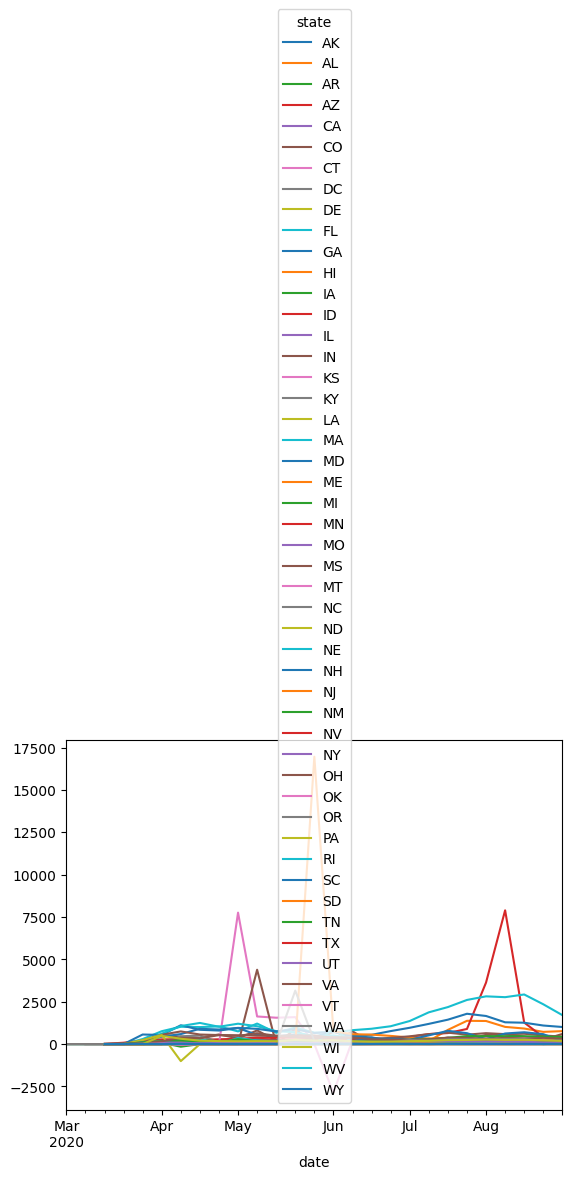

In [1112]:
wide_df = new_hospitalizations_covid_tracker_weekly.pivot_table(index='date', columns='state', values='hospitalizedIncrease')
wide_df.plot()

<Axes: xlabel='date'>

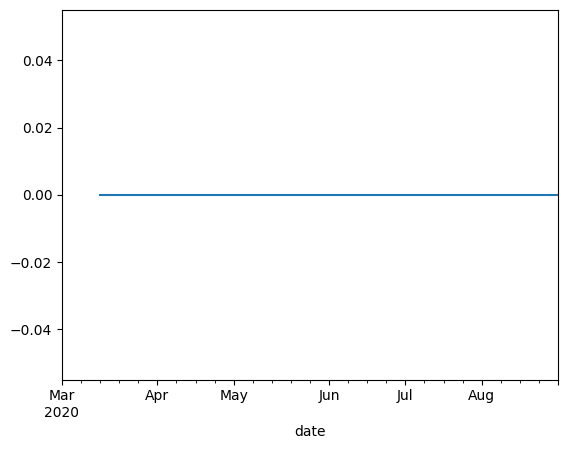

In [1113]:
(wide_df['CA']/population_by_state_April_2020_abb['CA'] * 100000).plot()

- Again, lots of missing data... Could calculate own change in hospitalizations 

In [1122]:

hospitalizations_covid_tracker_daily = hospitalizations_covid_tracker_daily_all[['date', 'state', 'hospitalizedCurrently']]
hospitalizations_covid_tracker_daily = hospitalizations_covid_tracker_daily.sort_values('date').reset_index(drop=True)
hospitalizations_covid_tracker_daily = hospitalizations_covid_tracker_daily.sort_values(['state', 'date']).reset_index(drop=True)
hospitalizations_covid_tracker_daily['date'] = pd.to_datetime(hospitalizations_covid_tracker_daily['date'])
hospitalizations_covid_tracker_daily = hospitalizations_covid_tracker_daily[(hospitalizations_covid_tracker_daily['state'] != 'PR') & (new_hospitalizations_covid_tracker_daily['state'] != 'VI') & (new_hospitalizations_covid_tracker_daily['state'] != 'GU')& (new_hospitalizations_covid_tracker_daily['state'] != 'AS')& (new_hospitalizations_covid_tracker_daily['state'] != 'MP')]


In [1157]:
x = -1
hospitalizations_covid_tracker_daily['new_hospitalizations'] = 'None'
for state in hospitalizations_covid_tracker_daily['state'].unique():
    state_data = hospitalizations_covid_tracker_daily[hospitalizations_covid_tracker_daily['state'] == state].reset_index()
    for row in range(len(state_data ) - 1): 
        x += 1
        hospitalizations_covid_tracker_daily.iloc[x,3] = state_data.loc[row + 1, 'hospitalizedCurrently'] - state_data.loc[row, 'hospitalizedCurrently']
    x += 1
    hospitalizations_covid_tracker_daily.iloc[x,3] = hospitalizations_covid_tracker_daily.iloc[x-1,3]



- Use data from above

In [1163]:
delta_hospitalizations_covid_tracker_weekly = pd.DataFrame(columns=hospitalizations_covid_tracker_daily.columns[0:3], index=range(num_rows ))

x = -1

for state in hospitalizations_covid_tracker_daily['state'].unique():
    state_data = hospitalizations_covid_tracker_daily[hospitalizations_covid_tracker_daily['state'] == state].reset_index()
    for date in dates: 
        x += 1
        delta_hospitalizations_covid_tracker_weekly.iloc[x,1] = state
        delta_hospitalizations_covid_tracker_weekly.iloc[x,0] = date
        if (state_data.loc[0, 'date'] > date) | (state_data.loc[0, 'date'] >= (date - timedelta(days=7))):
            q = 0
            #State_hospitalizations_new_weekly.iloc[x,2] = 0
        else: 
            end_index = state_data.loc[state_data['date'] < date, 'date'].idxmax()
            start_index = state_data.loc[(state_data['date'] <= (date - timedelta(days=7))), 'date'].idxmax()
            selected_rows = state_data.iloc[start_index:end_index, len(state_data.columns)-1]
            cumulative_sum = selected_rows.sum()
                
            delta_hospitalizations_covid_tracker_weekly.iloc[x,2] = cumulative_sum

In [1165]:
delta_hospitalizations_covid_tracker_weekly_wide = delta_hospitalizations_covid_tracker_weekly.pivot_table(index='date', columns='state', values='hospitalizedCurrently')


<Axes: xlabel='date'>

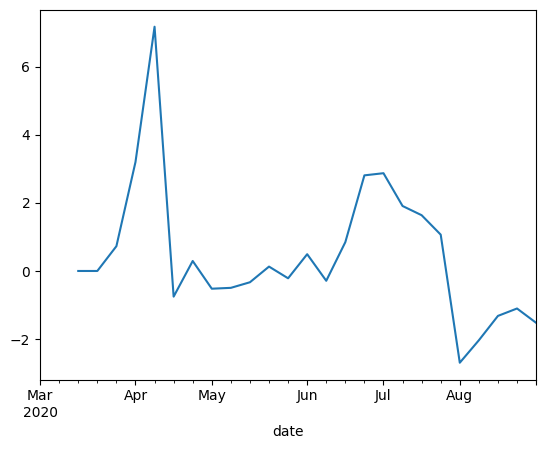

In [1166]:
(delta_hospitalizations_covid_tracker_weekly_wide['CA']/population_by_state_April_2020_abb['CA'] * 100000).plot()

In [1169]:
state_names = delta_hospitalizations_covid_tracker_weekly_wide.columns[delta_hospitalizations_covid_tracker_weekly_wide.columns != 'index']

over_15k = pd.DataFrame()
delta_per_100k = pd.DataFrame()
for state in state_names: 
    col_name_rate = state + 'hospitalizations'
    delta_hospitalizations_covid_tracker_weekly_wide[col_name_rate] = delta_hospitalizations_covid_tracker_weekly_wide[state]/population_by_state_April_2020_abb[state] * 100000
    col_name_threshold = state + '_over_15_100k'
    over_15k[col_name_threshold] = (delta_hospitalizations_covid_tracker_weekly_wide[col_name_rate] > 15)*1
    col_name_delta = state + '_delta_100k'
    for row in range(len(delta_hospitalizations_covid_tracker_weekly_wide)):
        if row < 7:
            delta_per_100k.loc[row, col_name_delta] = 0
        else: 
            delta_per_100k.loc[row, col_name_delta] = first_six_months_by_state_100k.loc[row, col_name_rate] - first_six_months_by_state_100k.loc[row - 7, col_name_rate]

# Try DELPHI EPIDATA
- Seems to be same data that I already have

In [1172]:

from delphi_epidata import Epidata
# Fetch data
res = Epidata.covid_hosp('MA', 20200510)
res

{'epidata': [{'state': 'MA',
   'geocoded_state': None,
   'issue': 20230626,
   'date': 20200510,
   'critical_staffing_shortage_today_yes': 0,
   'critical_staffing_shortage_today_no': 0,
   'critical_staffing_shortage_today_not_reported': 84,
   'critical_staffing_shortage_anticipated_within_week_yes': 0,
   'critical_staffing_shortage_anticipated_within_week_no': 0,
   'critical_staffing_shortage_anticipated_within_week_not_reported': 84,
   'hospital_onset_covid': 53,
   'hospital_onset_covid_coverage': 84,
   'inpatient_beds': 15691,
   'inpatient_beds_coverage': 73,
   'inpatient_beds_used': 12427,
   'inpatient_beds_used_coverage': 83,
   'inpatient_beds_used_covid': 3625,
   'inpatient_beds_used_covid_coverage': 84,
   'previous_day_admission_adult_covid_confirmed': None,
   'previous_day_admission_adult_covid_confirmed_coverage': 0,
   'previous_day_admission_adult_covid_suspected': None,
   'previous_day_admission_adult_covid_suspected_coverage': 0,
   'previous_day_admissio

# Now do cases - from NY TIMES

In [1231]:
State_data_cases_death = pd.read_csv("/Users/rem76/Documents/COVID_projections/us-states.csv")
State_data_cases_death = State_data_cases_death[['date', 'state', 'cases_avg_per_100k', 'deaths_avg_per_100k']]
State_data_cases_death['date'] = pd.to_datetime(State_data_cases_death['date'])
State_data_cases_death = State_data_cases_death.sort_values('date').reset_index(drop=True)

State_data_cases_death['index'] = range(len(State_data_cases_death['date']))
start_date_row = State_data_cases_death[State_data_cases_death['date'] == '2020/03/01']['index'].min()

start_date_index_dates = int(np.where(State_data_cases_death['date'].unique() == '2020/03/01')[0])
six_month_date_index_dates = State_data_cases_death['date'].unique()[(26 * 7) + start_date_index_dates]

end_date_row = State_data_cases_death[State_data_cases_death['date'] == six_month_date_index_dates]['index'].max()
State_data_cases_death_first_six_months = State_data_cases_death[start_date_row:end_date_row]
State_data_cases_death_first_six_months = State_data_cases_death_first_six_months[(State_data_cases_death_first_six_months['state'] != 'Puerto Rico') & (State_data_cases_death_first_six_months['state'] != 'Virgin Islands') & (State_data_cases_death_first_six_months['state'] != 'Guam')& (State_data_cases_death_first_six_months['state'] != 'American Samoa')& (State_data_cases_death_first_six_months['state'] != 'Northern Mariana Islands')]
State_data_cases_death_first_six_months.drop('index', axis=1, inplace = True)
State_data_cases_death_first_six_months = State_data_cases_death_first_six_months.reset_index(drop=True)


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/776212600.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date_index_dates = int(np.where(State_data_cases_death['date'].unique() == '2020/03/01')[0])


In [1233]:

x = 0
for state_name in State_data_cases_death_first_six_months['state']:
    State_data_cases_death_first_six_months.loc[x,'state']  = convert_state_name_to_abbreviation(state_name)
    x += 1

In [1242]:
State_data_cases_death_first_six_months_cases = State_data_cases_death_first_six_months.pivot_table(index='date', columns='state', values= 'cases_avg_per_100k')
State_data_cases_death_first_six_months_deaths = State_data_cases_death_first_six_months.pivot_table(index='date', columns='state', values= 'deaths_avg_per_100k')


State_data_cases_death_first_six_months = pd.merge(State_data_cases_death_first_six_months_cases, State_data_cases_death_first_six_months_deaths, on='date')


In [1243]:
new_column_names = [col.replace('x', 'cases') for col in State_data_cases_death_first_six_months.columns]
State_data_cases_death_first_six_months.rename(columns=dict(zip(State_data_cases_death_first_six_months.columns, new_column_names)), inplace=True)

new_column_names = [col.replace('y', 'deaths') for col in State_data_cases_death_first_six_months.columns]
State_data_cases_death_first_six_months.rename(columns=dict(zip(State_data_cases_death_first_six_months.columns, new_column_names)), inplace=True)


# Bring it all together 
- Cases per 100k: State_data_cases_death_first_six_months
- Mortality per 100k: State_data_cases_death_first_six_months
- New hospitalizations per 100k:  delta_per_100k (which is the change in hospitalizations...)
- COVID-19 hospitalizations per 100k: first_six_months_by_state_weekly_hospital_cases


In [1441]:
all_state_weekly_data = pd.merge(State_data_cases_death_first_six_months, first_six_months_by_state_weekly_hospital_cases, on = 'date')

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/812844626.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_state_weekly_data = pd.merge(State_data_cases_death_first_six_months, first_six_months_by_state_weekly_hospital_cases, on = 'date')


In [1448]:
all_state_weekly_data = all_state_weekly_data.loc[:, all_state_weekly_data.columns != 'state']


In [1449]:
all_state_weekly_data.to_csv("all_state_weekly_data_cases_deaths_admissions_hospital.csv")

# New dataset for counties 

In [1542]:
county_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv")
county_data['index'] = range(len(county_data))

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/1833658409.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  county_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv")


In [1524]:
columns = ['state', 'zip', 'collection_week', 'previous_day_admission_adult_covid_confirmed_7_day_sum', 'previous_day_admission_adult_covid_suspected_7_day_sum']
is_weeks = True
date_column = 'collection_week'
start_date = '2020/07/05'
number_weeks = 26

In [1510]:
def data_prep_dates(dataset, columns, date_column, start_date, number_weeks, is_weeks):
    """
    Takes data frame with daily or weekly data and subsets rows between two dates. 
    """

    dataset = dataset[columns]

    dataset = dataset.sort_values(date_column).reset_index(drop=True)

    dataset['index'] = range(len(dataset[date_column]))
    start_date_row = dataset[dataset[date_column] == start_date]['index'].min()

    start_date_index_dates = int(np.where(dataset[date_column].unique() == start_date)[0])
    if is_weeks: 
        six_month_date_index_dates = dataset[date_column].unique()[number_weeks + start_date_index_dates]
    else:
        six_month_date_index_dates = dataset[date_column].unique()[(number_weeks * 7) + start_date_index_dates]

    end_date_row = dataset[dataset[date_column] == six_month_date_index_dates]['index'].max()
    dataset = dataset[start_date_row:end_date_row]
    return(dataset)

In [1525]:
county_data = data_prep_dates(county_data, columns, date_column, start_date, number_weeks, is_weeks)

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_3557/3951266312.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_date_index_dates = int(np.where(dataset[date_column].unique() == start_date)[0])


In [1527]:
print(len(county_data[county_data['previous_day_admission_adult_covid_confirmed_7_day_sum'] == -999999.0	])/len(county_data['previous_day_admission_adult_covid_confirmed_7_day_sum'] )*100)
print(len(county_data[pd.isna(county_data['previous_day_admission_adult_covid_confirmed_7_day_sum'])])/len(county_data['previous_day_admission_adult_covid_confirmed_7_day_sum'] )*100)


17.96704327915619
6.720468450883976


In [1552]:
county_data['previous_day_admission_adult_covid_confirmed_7_day_sum'] = county_data['previous_day_admission_adult_covid_confirmed_7_day_sum'].apply(lambda x: 2 if x < 0 else x)
county_data['previous_day_admission_pediatric_covid_confirmed_7_day_sum'] = county_data['previous_day_admission_pediatric_covid_confirmed_7_day_sum'].apply(lambda x: 0.5 if x < 0 else x)

# bed usage
county_data['inpatient_beds_used_covid_7_day_sum'] = county_data.apply(lambda row: (0 if row['total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum'] < 0 else row['total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum']) +
                                                                                    (0 if row['total_adult_patients_hospitalized_confirmed_covid_7_day_sum'] < 0 else row['total_adult_patients_hospitalized_confirmed_covid_7_day_sum']), axis=1)
county_data['inpatient_beds_7_day_sum'] = county_data['inpatient_beds_7_day_avg'].apply(lambda x: 0 if x < 0 else x)

# staffed ICU adult patients
county_data['staffed_icu_adult_patients_confirmed_covid_7_day_sum'] = county_data['staffed_icu_adult_patients_confirmed_covid_7_day_sum'].apply(lambda x: 0.5 if x < 0 else x)


['',
 '#%reset\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n\nhfont = {\'fontname\':\'Helvetica\'}\n\n## read data from Alysssa\nHSA_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/hsa_time_data.csv")\nCounty_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/county_time_data.csv")\n\n## read in data from https://gis.cdc.gov/grasp/COVIDNet/COVID19_3.html\nState_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/COVID-19Surveillance_All_Data.csv")',
 '#%reset\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n\nhfont = {\'fontname\':\'Helvetica\'}\n\n## read data from Alysssa\nHSA_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/hsa_time_data.csv")\nCounty_data = pd.read_csv("/Users/rem76/Documents/COVID_projections/Cleaned/county_time_data.csv")\n\n## read in data from https://gis.cdc.gov/grasp/COVIDNet/COVID19_3.html\nState_data = pd.read_csv("/Users/rem76/Doc

In [1528]:
print(len(county_data[county_data['previous_day_admission_adult_covid_suspected_7_day_sum'] == -999999.0	])/len(county_data['previous_day_admission_adult_covid_suspected_7_day_sum'] )*100)
print(len(county_data[pd.isna(county_data['previous_day_admission_adult_covid_suspected_7_day_sum'])])/len(county_data['previous_day_admission_adult_covid_suspected_7_day_sum'] )*100)


16.178822116286927
6.992230021395593


# Import data that was processed using ALyssa's script 

In [1560]:
data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/County_level_hospitalizations_death.csv')
data_by_county.columns


Index(['Unnamed: 0', 'fips', 'date', 'state', 'cases_avg', 'deaths_avg',
       'chk1', 'chk2', 'STNAME', 'POPESTIMATE2019', 'CTYNAME', 'ABBR', 'ymd',
       'year', 'week', 'year_wk', 'cases_avg_per_100k', 'deaths_avg_per_100k',
       'health_service_area_population.x', 'admits_confirmed_avg',
       'perc_covid', 'admits_confirmed_100K', 'icu_100K', 'cdc_flag_1',
       'cdc_flag_2', 'cdc_flag', 'deaths_21_lag_100k', 'icu_21_lag_100K',
       'cases_lag_21_100K', 'admits_7_lag', 'admits_7d_ago', 'admits_21d_ago',
       'admits_28d_ago', 'dotw', 'chk', 'county_rank',
       'deaths_21_lag_100k_14d', 'deaths_weekly', 'admits_weekly',
       'cases_weekly', 'icu_weekly', 'perc_covid_100', 'cfr',
       'half_zeke_time_3', 'zeke_time_3', 'two_zeke_time_3', 'icu_2_time_3',
       'zeke_time_3_14d', 'two_zeke_time_3_14d', 'weight', 'weight_alt'],
      dtype='object')

In [1561]:
data_by_county.columns
data_by_county_cases = data_by_county[['CTYNAME', 'week', 'cases_weekly']]
data_by_county_deaths = data_by_county[['CTYNAME', 'week', 'deaths_weekly']]
data_by_county_admissions = data_by_county[['CTYNAME', 'week', 'admits_weekly']]